# Projekt IUM Politechnika Warszawska (Dokumentacja + Realizacja)

## Podstawowe informacje



### Prowadzący
dr inż. Paweł Zawistowski

### Autorzy
- Maciej Kasprzyk
- Wojciech Sitek

### Tytuł projektu
e-Shoppping - decyzja o zniżkach dla klientów

### Numer zadania
1.03

### Temat projektu
Niektórzy klienci nie mogą zdecydować się na zakup oglądając produkt na stronie – ale pewnie gdybyśmy wiedzieli, które to są osoby, to odpowiednia zniżka skłoniłaby ich do zakupu.

## Etap 1 - dokumentacja wstępna



### Termin
2020.05.01

### Do zrobienia
- definicja problemu biznesowego i zdefiniowanie zadania/zadań modelowania,.
- analiza danych z perspektywy realizacji tych zadań (trzeba ocenić, czy dostarczone dane są wystarczające – może czegoś brakuje, może coś trzeba poprawić, domagać się innych danych, ...)

## Definicja problemu biznesowego i zadań modelowania



1. Jaka jest obecna sytuacja?
    - W obecnej sytuacji działa aplikacja webowa sklepu internetowego, w którym można zdalnie dokonać zakupu produktów o określonej cenie.
    - Aplikacja rejestruje historię zakupów i obsługuje logowanie użytkowników.
    - Sklep zbiera logi ze swojej działalności o 4 rodzajach: użytkownicy, sesje, dostawy oraz produkty.
    - Sklep prosperuje bardzo dobrze, jednak kierownictwo nie chce "osiąść na laurach".

2. Jakie są obserwacje stanu faktycznego i przypuszczenia odnośnie działalności sklepu?
    - W firmie powstało przypuszczenie, że wielu klientów przegląda wielokrotnie te same produkty, ale finalnie nie decyduje się na ich zakup.
    - Gdyby jednak dla konkretnego klienta zostało zaadrasowane zaproszenie do tańszego zakupu produktu, w sklepie pojawiłoby się więcej klientów i kupowaliby oni więcej produktów.

3. Co ma zostać wprowadzone?
    - Istnieje podejrzenie, że analiza działalności sklepu internetowego i wprowadzenie udogodnień związanych z uczeniem maszynowym przyniesie duże korzyści.
    - Zostało więc zaproponowane usprawnienie, polegające na zautomatyzowanym proponowaniu klienowi zniżki na oglądany produkt na podstawie danych o jego wcześniej przeglądanych produktach.

4. Jakie są dostępne zasoby?
    - Zasoby, z których można korzystać podczas projektu to dane z przeszłości dotyczące użytkowników, sesji, dostaw oraz produktów oraz temat projektu zadany w konwencji biznesowej (bez szczegółów analitycznych czy technicznych).
    
5. Jakie są założenia i ograniczenia?
    - Zakładamy, że zysk firmy z każdego zakupu produktu bez zniżki to 30% ceny produktu.
    - System może przyznawać zniżki o wartości 5%, 10%, 15% i 20% ceny produktu.
    - System dąży do maksymalizacji zysku, proponując jak najniższe "skuteczne" zniżki.

### Biznesowe kryteria sukcesu
- Organizacja jest znana ze zniżek przy zakupach.
- Organizacja przewyższa konkurencję w niższych cenach produktów, a jednocześnie stosuje promocje tam, gdzie jest to najbardziej opłacalne.
- Inwestycja w przygotowanie i wdrożenie projektu zwraca się po określonym czasie, a następnie wytwarza zyski dla organizacji.
- Sklep może być reklamowany jako "inteligentny", "wykorzystujący nowoczesne narzędzia", "wykorzystujący sztuczną inteligencję".
    
### Zadania modelowania
W ramach projektu jest realizowane jedno zadanie modelowania. Model będzie zbudowany jako klasyfikator sekwencji na bazie sieci LSTM. Wejściem sieci będzie zdarzenie, które jest częścią historii zdarzeń użytkownika. Jego wyjściem będzie prawdopodobieństwo kupna produktu przez klienta.

Z racji że stawki zniżek są dyskretne (0%, 5%, 10%, 15%, 20%), rosnąco dla kolejnych zniżek model wyznaczy prawdopodbieństwo kupna. Gdy osiągnie ono wyznaczony poziom, ta zniżka będzie proponowana klientowi.

## Analiza danych

### Zadanie do wykonania
Analiza danych z perspektywy realizacji zdefiniowanych zadań modelowania (trzeba ocenić, czy dostarczone dane są wystarczające – może czegoś brakuje, może coś trzeba poprawić, domagać się innych danych, ...)


### Analiza danych sesji

In [18]:
df_events.head()

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2020-02-08T19:35:57,NaN,NaN,VIEW_PRODUCT,0,NaN
1,100001,2020-02-08T19:38:21,102.0,1281.0,VIEW_PRODUCT,0,NaN
2,100002,2020-01-06T05:59:46,102.0,1002.0,VIEW_PRODUCT,0,NaN
3,100002,2020-01-06T06:02:55,102.0,1003.0,VIEW_PRODUCT,0,NaN
4,100002,2020-01-06T06:04:07,102.0,1075.0,VIEW_PRODUCT,0,NaN


In [ ]:
import json
import pandas as pd

events = []
with open("input_files/sessions.jsonl") as file:
  lines = [x.strip() for x in file.readlines()]
  events = [json.loads(x) for x in lines]

def count_nones(array, field):
  return sum(e[field] is None for e in array)

df_events = pd.DataFrame(events)
df_events.info()

print("\n\nNull products count: ", count_nones(events,'product_id'))
print("Null users count: ", count_nones(events,'user_id'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50834 entries, 0 to 50833
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   session_id        50834 non-null  int64  
 1   timestamp         50834 non-null  object 
 2   user_id           48333 non-null  float64
 3   product_id        48296 non-null  float64
 4   event_type        50834 non-null  object 
 5   offered_discount  50834 non-null  int64  
 6   purchase_id       1846 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.7+ MB


Null products count:  2538
Null users count:  2501


Po wstępnej analizie danych stwierdzamy, że są braki w kolumnach `user_id` oraz `product_id`. Wartości null w kolumnie `purchase_id` oznaczają, że nie doszło do zakupu.

Brakujące dane należy uzupełnić lub usunąć rekordy niemożliwe do uzupełnienia.

In [19]:
df_events['offered_discount'].describe()

count    50834.000000
mean         5.256226
std          7.193651
min          0.000000
25%          0.000000
50%          0.000000
75%         10.000000
max         20.000000
Name: offered_discount, dtype: float64

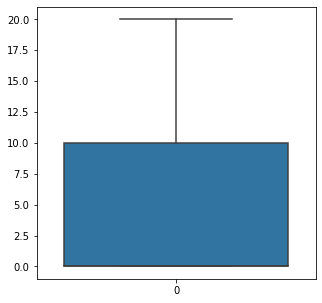

In [20]:
import seaborn as sns
import matplotlib as plt

plt.rcParams['figure.figsize'] = [5, 5]
sns.boxplot(data = df_events['offered_discount'])

Widać tutaj, że średnia dawanej zniżki to lekko ponad 5%. Jednak ponad 50% odsłon produktów nie otrzymało żadnej zniżki. Są one więc dość rzadką sytuacją w danych.

Skoro w danych brakuje niektórych komórek, możemy uzupełnić `user_id` na podstawie wartości z tej samej sesji.

In [21]:
# prepare dict
user_of_session = dict() # session_id as key
for event in events:
  session_id = event['session_id']
  user_id = event['user_id']
  if user_id != None and not session_id in user_of_session:
    user_of_session[session_id] = user_id

# complete the data    
for event in events:
  if event['user_id'] == None and event['session_id'] in user_of_session:
    event['user_id'] = user_of_session[event['session_id']]

# check
print("Null users count: ", count_nones(events,'user_id'))

Null users count:  83


Udało się usunąć większość braków. Usuńmy rekordy, których nie dało się wypełnić.

In [22]:
events = [e for e in events if e['user_id'] != None]
# Check
print("Null users count: ", count_nones(events,'user_id'))

Null users count:  0


Po naprawieniu lub usunięciu niektórych rekordów udało się wyeliminować komórki `null` dla pola `user_id`.

Następnie przechodzimy do naprawy kolumny `product_id`.

Niestety nie możemy nic zrobić z brakującymi wartościami `product_id`, ponieważ nie mamy możliwości ich uzupełnienia.
Usuńmy rekordy z brakującymi danymi.

In [23]:
events = [e for e in events if e['product_id'] != None]
# check
print("Null products count: ", count_nones(events,'product_id'))

Null products count:  0


Udało się wyeliminować niepożądane puste komórki.
Zapiszmy dane.

In [24]:
import os
import json

folder = 'data'

if not os.path.exists(folder):
    os.makedirs(folder)

with open(folder + '/events.json', 'w') as file:
    json.dump(events,file, indent=2)


### Analiza danych użytkowników


In [25]:
with open("input_files/users.jsonl") as file:
  lines = [x.strip() for x in file.readlines()]
  users = [json.loads(x) for x in lines]

pd.DataFrame(users).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  200 non-null    int64 
 1   name     200 non-null    object
 2   city     200 non-null    object
 3   street   200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


Dane użytkowników wyglądają na kompletne. Jest zarejestrowanych 200 użytkowników.

Sprawdźmy, czy pole `user_id` z pliku `sessions` odpowiada polu `user_id` z pliku `users`

In [26]:
user_ids = set(user['user_id'] for user in users)
for event in events:
    assert event['user_id'] in user_ids


Zapiszmy dane

In [27]:
with open(folder + '/users.json', 'w') as file:
    json.dump(users,file, indent=2)


### Analiza danych produktów

In [28]:
products = []
with open("input_files/products.jsonl") as file:
  lines = [x.strip() for x in file.readlines()]
  for line in lines:
    products.append(json.loads(line))

df_products = pd.DataFrame(products)

In [29]:
df_products.describe()

,product_id,price
count,319.000000,3.190000e+02
mean,1160.000000,3.432752e+06
std,92.231593,3.530967e+07
min,1001.000000,-3.777000e+03
25%,1080.500000,2.340000e+01
50%,1160.000000,3.990000e+01
75%,1239.500000,9.999000e+01
max,1319.000000,6.090000e+08


In [30]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     319 non-null    int64  
 1   product_name   319 non-null    object 
 2   category_path  319 non-null    object 
 3   price          319 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ KB


Po wstępnej analizie danych produktów dostrzegamy, że średnia (~1 mln), wartość minimalna (~-3000) oraz wartość maksymalna (~6e08) zdecydowanie odbiega od oczekiwań. Występują wartości ujemne oraz wartości, które są o kilka rzędów wielkości zawyżone.

In [31]:
wrong_products = [product for product in products if not (0 < product['price'] < 10000)]
print("Ilość nieprawidłowych cen", len(wrong_products))

Ilość nieprawidłowych cen 31


Rekordów produktów jest mało (319), a błednych jeszcze mniej (31). Dla poprawności modelu nie ma potrzeby, aby cena była znana dokładnie, ważny jest rząd wielkości. Najwygodniej będzie poprawić błędne rekordy ręcznie. Błędne ceny oszacujemy na podstawie naszej wiedzy eksperckiej na temat cen produktów w Internecie (czytaj: sprawdzimy w Google).

Gdyby błędnych rekordów było dużo więcej, to można by było ten proces zautomatyzować.

Spójrzmy na dane produktów po ręcznym skorygowaniu cen:

In [32]:
products = []
with open("input_files/products_fix.jsonl") as file:
  lines = [x.strip() for x in file.readlines()]
  for line in lines:
    products.append(json.loads(line))

pd.DataFrame(products).describe()

,product_id,price
count,319.000000,319.000000
mean,1160.000000,247.905455
std,92.231593,813.757150
min,1001.000000,1.000000
25%,1080.500000,24.990000
50%,1160.000000,41.000000
75%,1239.500000,94.265000
max,1319.000000,7639.000000


Po poprawieniu nie mamy cen ujemnych ani większych od 10000. Sprawdźmy ceny wysokie.

In [33]:
for p in products:
  if p["price"] > 1000:
    print(p['price'],"--",p["product_name"])

2048.5 -- Kyocera FS-1135MFP
7639.0 -- Kyocera FS-3640MFP
3029.0 -- LCD Iiyama T1932MSC
1079.0 -- LCD NEC EA223WM
2199.9 -- Samsung Galaxy S III GT-i9300
1117.01 -- LCD Asus VK278Q
1419.0 -- LCD Asus PA248Q
2065.0 -- LCD Iiyama T1931SR
1998.14 -- Ricoh SG3110DN
2399.0 -- Samsung CLX-6260FR ### Gadżety Samsung ### Eksploatacja -10% ### Negocjuj Cenę ### Raty ### Szybkie Płatności ### Szybka Wysyłka
3777.0 -- Kyocera FS-C2026MFP
5126.0 -- Kyocera FS-3540MFP
4598.0 -- Kyocera FS-3040MFP
5301.9 -- Kyocera FS-3140MFP
5259.0 -- OKI B840dn
1816.97 -- Apple iPad mini 64GB
2317.02 -- Apple iPad mini 64GB 4G
1303.96 -- Plantronics Savi W740


Wszystkie ceny mieszczą się w przedziale `(0 ; 10 000)`. Wszystkie powyżej `1000 zł` są uzasadnione, ponieważ dotyczą produktów faktycznie drogich.
Zapiszmy dane.

In [34]:
with open(folder + '/products.json', 'w') as file:
    json.dump(products,file, indent=2)


## Analiza danych dostaw

Nie przeprowadzono analizy danych dostaw, ponieważ nie będą wykorzystywane przy projekcie.

## Założenia analityczno-techniczne


Projekt będzie realizowany w języku Python 3. Cała dokumentacja i realizacja projektu znajduje się w jednym pliku typu Jupyter Notebook. Realizacja zostanie na końcu projektu wyeksportowana do pliku i skompresowana narzędziem _zip_. Dane zostają wczytane z 3 plików: *products_fix.jsonl*, _sessions.jsonl_ oraz _users.jsonl_.